It is useful for us to be able to tell how experimental the comic syle is in the context of the entire corpus of the French five-act comedies in verse. We will define the more experimental style as the style that tends to have:
- a higher number of dramatic characters
- a higher mobility coefficient
- a higher standard range of the number of speaking characters (sigma)
- a higher percentage of polylogues
- a lower percentage of monologues.

Our assumption is that all the examined features contribute to the "openenness" of style. 

We will introduce take a closer look at the evolution of comedic style by ten year intervals.
- We will introduce **open-form scores** that measure how experimental a style of a particular ten-year interval is.
- We will trace the evolution of these scores by ten year intervals over three centuries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

In [2]:
data = pd.read_csv('../French_Comedies/Data/French_Comedies_Data.csv')

In [3]:
def twenty_year_intervals(n):
    return n + (20 - n) % 20

In [4]:
# include only five act comedies and only original comedies
original_comedies = data[(data['num_acts'] ==5)&
                         (data['translation/adaptation/contrastive'] == 0)].copy()
sorted_comedies = original_comedies.sort_values(by='date')

In [5]:
def interval_data(data_df, feature):
    overall_mean = round(data_df[feature].mean(), 2)
    overall_std = round(data_df[feature].std(), 2)
    statistics = ['mean'] 
    all_data = pd.DataFrame(data_df.groupby(['ten_year_intervals'])[feature].mean())
    all_data.columns= ['mean']
    all_data['z_score'] = (all_data['mean'] - overall_mean) / overall_std
    
    return  all_data

In [6]:
def scores_calculation(df, with_z_score=True):
    if with_z_score:
        column = 'z_score'
        sigma_col = column
    else:
        column = ['mean']
        sigma_col = 'sigma_iarkho'
    summary = pd.DataFrame(interval_data(df, 'num_present_characters')[column])
    summary.columns = ['num_present_characters']
    # make sure the order of the playwrights is the same
    
    ind = summary.index
    summary['mobility_coefficient'] = interval_data(df, 'mobility_coefficient', 
                                                        ).loc[ind, column]
    summary['sigma_iarkho'] = interval_data(df, 'sigma_iarkho', 
                                                        ).loc[ind, column]
    summary['polylogues'] = interval_data(df, 'percentage_polylogues', 
                                                         ).loc[ind, column]
    summary['monologues'] = interval_data(df, 'percentage_monologues', 
                                                         ).loc[ind, column]
    summary = summary.round(2)
    if with_z_score:
        summary['monologues'] = summary['monologues'].apply(lambda x: -x)
        summary['open_form_score'] = round(summary.apply(lambda x: x.mean(), axis=1), 2)
        summary = summary.sort_values(by='open_form_score', ascending=False)
    counts = df.groupby('ten_year_intervals')['index'].count()
    summary['num_comedies'] = counts[summary.index].values
    
    return summary

In [7]:
sorted_comedies = sorted_comedies.rename(columns={'num_scenes_iarkho': 'mobility_coefficient', 
                                                  'percentage_non_duologues': 'percentage_non_dialogues',
                                                  'percentage_above_two_speakers': 'percentage_polylogues',
                                                   'decades': 'ten_year_intervals'})

In [8]:
summary = scores_calculation(sorted_comedies, True)

In [9]:
summary_with_means = scores_calculation(sorted_comedies, False).loc[summary.index, :]

In [10]:
summary_with_means['open_form_score'] = summary.open_form_score.tolist()

## Open-Form Scores by Ten Year Intervals

### Ten Year Intervals
Here, I should clarify that during the process of creating intervals, I made 10-year intervals with the following logic (1743, 1747, 1749 will belong to 1750 10-year interval, likewise, 1831, 1835, 1837 will belong to 1840 10-year interval). In previous notebooks, I have used the term "decades" but a more appropriate terms is, in fact, 10 year-interval.

### Open Form Scores
1. We obtain the mean for each feature and each ten-year interval. 
2. Then, we compare the 10-year interval mean with the corpus mean for that feature by using z-scores that tell us how many standard deviations away from the mean is the observed score, i.e., how extreme it is in the context of the entire corpus. For all features, we will calculate **the z-score**: $z=(x-u)/s$ where where u is the mean of the feature and s is the standard deviation of this feature. For the percentage of monologues, we will reverse the sign, i.e., will use a negative **z-score** (i.e., - z-score) since it is the lower value of the percentage of monologues that indicates a more open form.
3. Our assumption is that all features will contribute to the "openenness" of style, therefore, the **open form score** will be the mean z-score across all features. For example, for 1840, the z-scores are 2.2, 0.98, 0.57, 0.13, -0.06. The open-form score is (2.2 + 0.98 + 0.57 + 0.13 -0.06) / 5 = 0.764.


#### The Logic Behind Open-Form Scores
At first, the idea was to compare the ten-year interval mean for a feature with the corpus mean of that feature, i.e, to be able to tell if this period tends to be above or below the corpus mean. Here, we would assign 1 for above the mean and 0 for below the mean for each feature and each ten year interval. Next, we would take the mode, i.e., answer the question: does the ten-year interval tend to be above or below the corpus mean most frequently? However, the realization was that by assigning simply 1 and 0, we are losing information of how much above or below the mean a particular value is: one period could have over 19 dramatic characters and another 13, but both would receive 1 for being above the mean. That is the reason why it was necessary to capture how much above the mean each value is. We used z-scores that tell us how many standard deviations away from the mean each observed value is (e.g., now the mean number of dramatic characters of 19.6 has the z-score of 2.20, whereas the 12.59 receives 0.31). For each ten year interval, we would calculate these z-scores for all features and take the mean to arrive at the final open-form score. 

### Z-Scores and Open-Form Scores

In [11]:
summary

,num_present_characters,mobility_coefficient,sigma_iarkho,polylogues,monologues,open_form_score,num_comedies
ten_year_intervals,,,,,,,
1840,2.20,0.98,0.57,0.13,-0.06,0.76,6
1660,0.31,-0.75,0.25,0.90,1.02,0.35,22
1690,0.96,0.08,-0.39,0.51,0.42,0.32,8
1680,0.45,0.09,0.10,0.43,0.50,0.31,11
1850,-0.02,0.90,0.42,-0.12,0.07,0.25,6
1670,-0.01,-0.50,0.30,0.46,0.68,0.19,19
1820,-0.19,0.28,0.30,0.38,-0.08,0.14,16
1800,0.05,0.50,0.18,-0.03,-0.30,0.08,13
1810,-0.14,0.49,0.05,0.04,-0.05,0.08,10


### Raw Numbers by Ten-Year Intervals

In [12]:
counts = sorted_comedies.groupby('ten_year_intervals')['index'].count()

In [13]:
summary_with_means

,num_present_characters,mobility_coefficient,sigma_iarkho,polylogues,monologues,num_comedies,open_form_score
ten_year_intervals,,,,,,,
1840,19.67,59.83,1.42,38.76,19.03,6,0.76
1660,12.59,38.77,1.31,48.42,9.36,22,0.35
1690,15.00,48.88,1.08,43.50,14.67,8,0.32
1680,13.09,49.00,1.25,42.46,13.97,11,0.31
1850,11.33,58.83,1.37,35.51,17.86,6,0.25
1670,11.37,41.84,1.32,42.81,12.35,19,0.19
1820,10.69,51.31,1.33,41.89,19.21,16,0.14
1800,11.62,54.00,1.28,36.69,21.18,13,0.08
1810,10.90,53.80,1.24,37.61,18.95,10,0.08


## Visualization

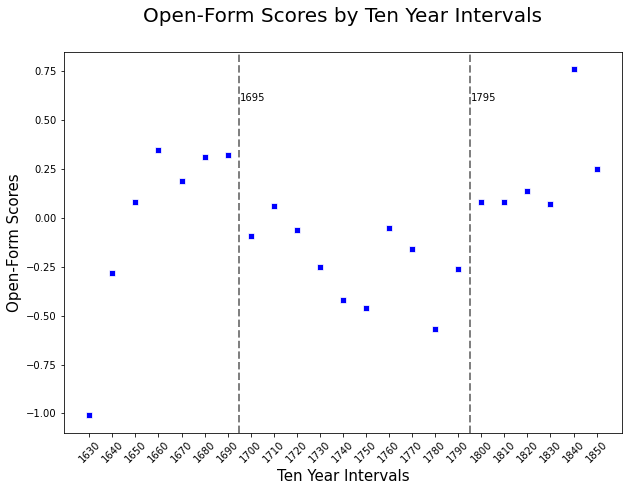

In [14]:
plt.figure(figsize=(10, 7))
plt.title('Open-Form Scores by Ten Year Intervals', fontsize=20, pad=30)
sns.scatterplot(summary.index.tolist(), summary['open_form_score'], color='blue', marker='s')
plt.xticks(summary.index.tolist(), rotation=45)
plt.ylabel('Open-Form Scores', fontsize=15)
plt.xlabel('Ten Year Intervals', fontsize=15)
plt.axvline(1695, color='grey',linestyle='dashed', linewidth=2)
plt.axvline(1795, color='grey',linestyle='dashed', linewidth=2)
plt.text(1695.5, 0.6, '1695')
plt.text(1795.5, 0.6, '1795')
plt.show()

In [15]:
sorted_comedies[sorted_comedies['ten_year_intervals']==1630][['title', 'last_name', 'first_name', 'date']]

,title,last_name,first_name,date
2,Mélite ou Les fausses lettres,Corneille,Pierre,1629


## Conclusions:
1. The highest mean open-form score (0.76) was observed during the 1840 ten-year interval (i.e, in the 1830-ies). However, the next two high mean open-form scores were observed in the seventeenth century (0.35 in the 1660 ten-year interval, 0.32 in 1690 ten-year interval). 
2. The lowest mean open-form score belongs to the 1630 ten-year period but is represented by a single comedy (Pierre Corneille's *Mélite*). The second to last ten year interval with the lowest score is 1780 with -0.57 and 1750 with -0.46.
3. There is a wave-like trend in the evolution of the open-form scores: with the dip in the second period from the three periods we have previously identified (Period one: from 1629 to 1695, period two: from 1696 to 1795, period three: from 1796 to 1847).